<a href="https://colab.research.google.com/github/sasergeevna/sasergeevna/blob/main/Titanic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Демонстрация использования различных библиотек для анализа и визуализации данных на тренировочном датасете с данными пассажиров Титаника
## Основная задача проекта:
**Анализ факторов выживаемости для улучшения протоколов безопасности.**

## Цели:
- Выявить ключевые демографические факторы, влияющие на выживаемость;
- Проанализировать эффективность принципа "сначала женщины и дети";
- Предложить рекомендации для будущих систем безопасности;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import chi2_contingency, ttest_ind

In [2]:
data = pd.read_csv('/content/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




---


**Описание переменных:**

Id - id пассажира;

Survived бинарная переменная: выжил пассажир (1) или нет (0);

Pclass - класс пассажира;

Name - имя пассажира;

Sex - пол пассажира;

Age - возраст пассажира;

SibSp - количество родственников второго порядка (братьев, сестер, супругов) пассажира на борту;

Parch - количество родителей и детей пассажира на борту;

Ticket - номер билета;

Fare - тариф (стоимость билета);

Cabin - номер кабины;

Embarked - порт, в котором пассажир сел на борт (C - Cherbourg, S - Southampton, Q = Queenstown);

**Созданные мной переменные:**

Title - обращение к пассажиру (Mr, Mrs, Miss, Master, Dr);

Alone - путешествует ли человек один или с кем-то;

New_sex - деление пассажиров на мужчин, женщин, детей;

# Подготовка данных к работе

In [3]:
def return_title(full_name):
  return(full_name.split(',')[1].split('.')[0].strip())

In [4]:
# Создадим новую переменную "Title" с обращением каждого пассажира (титулом: Mr/Mrs/Miss и тд)
data['Title'] = data.Name.apply(return_title)
data.Title.value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [5]:
data['Title']=data['Title'].apply(lambda x: 'Other' if x not in ['Mr', 'Mrs', 'Miss', 'Master', 'Dr'] else x)

In [6]:
data['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Other,20
Dr,7


In [7]:
# Создадим бинарную переменную "Alone", с информацией, путешествовал ли человек один или с кем-то
data['Family_size'] = data['SibSp'] + data['Parch']

In [8]:
data['Alone'] = data['Alone'] = data.Family_size.apply(lambda x: 1 if x==0 else 0)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,0,1


Проверим типы данных и количество наблюдений

In [9]:
data.info()
# Видим, в каких переменных у нас много пропущенных значений, поработаем с ними
# Изменим типы переменных Survived, Pclass, Name, которые распознаны некорректно
# Также удалим ненужные стоблцы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
 13  Family_size  891 non-null    int64  
 14  Alone        891 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB


In [10]:
del data['Ticket']

In [11]:
del data['Parch']

In [12]:
del data['SibSp']

In [13]:
del data['Cabin']

In [14]:
data.Survived = data.Survived.astype('object')
data.Pclass = data.Pclass.astype('object')

In [15]:
data.rename(columns={'PassengerId':'Id'}, inplace=True)

/tmp/ipython-input-3796648025.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Age.dropna(), fit=norm)


<Axes: xlabel='Age', ylabel='Density'>

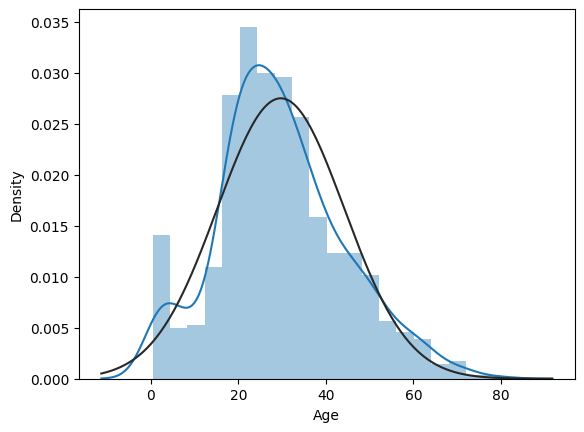

In [16]:
sns.distplot(data.Age.dropna(), fit=norm)

In [17]:
data.groupby('Sex')['Age'].median()

,Age
Sex,
female,27.0
male,29.0


In [18]:
#Заполним пропущенные значения возраста медианой в зависимости от пола
data["Age"] = data["Age"].fillna(data.groupby('Sex')["Age"].transform('median'))

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
 8   Title        891 non-null    object 
 9   Family_size  891 non-null    int64  
 10  Alone        891 non-null    int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 76.7+ KB


# Изучение данных и визуализация интересующих показателей


Проведем корреляционный анализ, чтобы проверить, есть ли взаимосвязь между переменными.

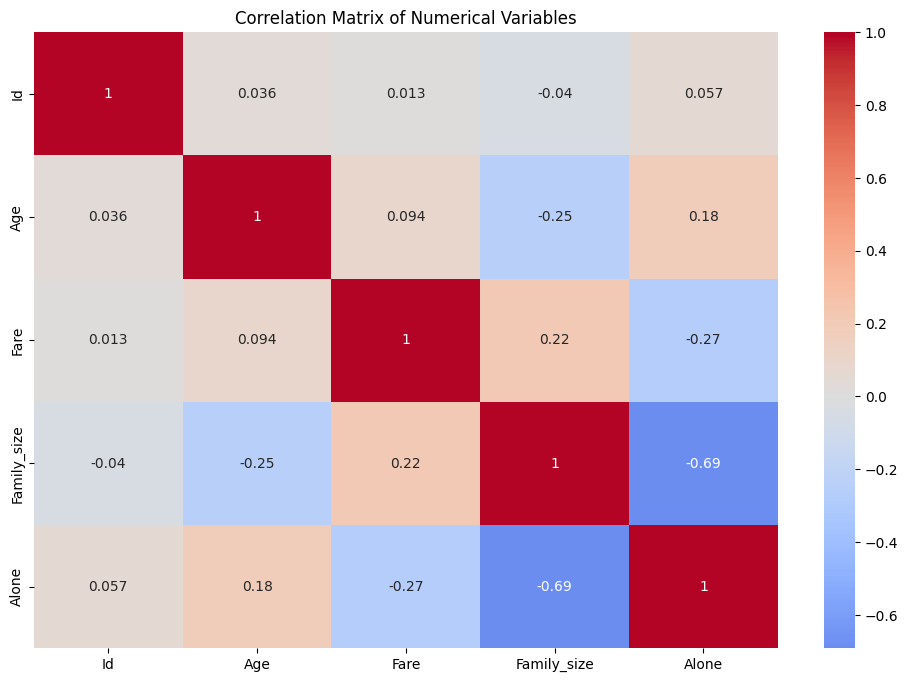

In [20]:
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Гипотеза №1.
На корабле не было незамужних девушек в возрасте до 25 лет, которые путешествовали в одиночку.

In [21]:
data[(data.Sex == 'female') & (data.Age > 18) & (data.Age < 25) & (data.Alone == 1) &(data.Title == 'Miss')].reset_index()

,index,Id,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,Family_size,Alone
0,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,7.8792,Q,Miss,0,1
1,56,57,1,2,"Rugg, Miss. Emily",female,21.0,10.5000,S,Miss,0,1
2,106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,7.6500,S,Miss,0,1
3,141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,7.7500,S,Miss,0,1
4,199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,13.0000,S,Miss,0,1
5,289,290,1,3,"Connolly, Miss. Kate",female,22.0,7.7500,Q,Miss,0,1
6,293,294,0,3,"Haas, Miss. Aloisia",female,24.0,8.8500,S,Miss,0,1
7,310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,83.1583,C,Miss,0,1
8,345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,13.0000,S,Miss,0,1
9,376,377,1,3,"Landergren, Miss. Aurora Adelia",female,22.0,7.2500,S,Miss,0,1


In [22]:
len(data[(data.Sex == 'female') & (data.Age > 18) & (data.Age < 25) & (data.Alone == 1) &(data.Title == 'Miss')])

21

Гипотеза №1 не подтвердилась. Не смотря на 1921 год, на корабле была 21 незамужняя девушка, путешествовавша без сопровождения.


---



Гипотеза №2. Выжило больше пассажиров, которые путешествовали c кем-то, чем пассажиров, путешествовавших в одиночку.


In [23]:
data.groupby(['Survived'])['Alone'].value_counts().unstack()

Alone,0,1
Survived,,
0,175,374
1,179,163


In [24]:
# Проверим статистическую значимость
contingency_table = pd.crosstab(data['Survived'], data['Alone'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square p-value for Alone vs Survived: {p_value:.4f}")

Chi-square p-value for Alone vs Survived: 0.0000


Статистическая значимость p-value = 0.000 (фактически < 0.001), значит связь между одиночным путешествием и выживаемостью не случайна.

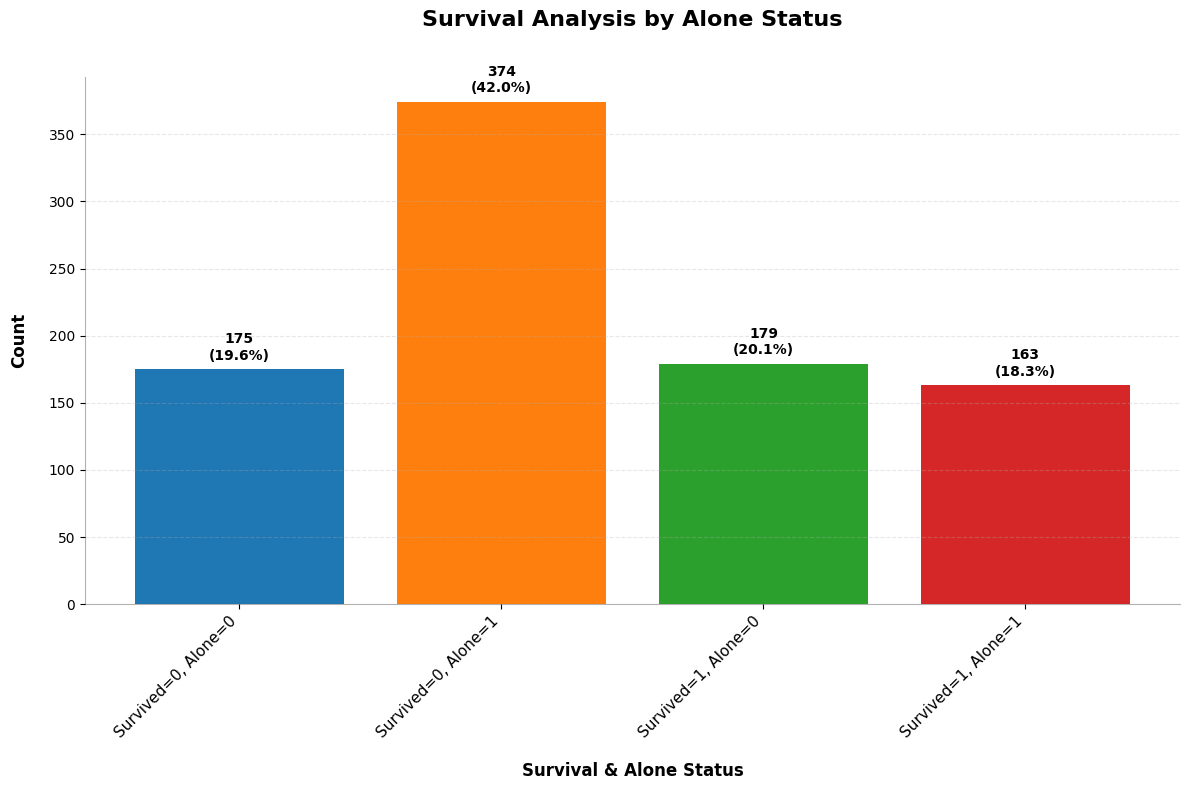

In [25]:
counts = data.groupby(['Survived'])['Alone'].value_counts().sort_index()
labels = [f"Survived={s}, Alone={a}" for s, a in counts.index]

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(range(len(counts)), counts.values,
              color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

ax.set_title('Survival Analysis by Alone Status\n', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Survival & Alone Status', fontsize=12, fontweight='bold', labelpad=15)
ax.set_ylabel('Count', fontsize=12, fontweight='bold', labelpad=15)
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=11)

for i, (bar, count) in enumerate(zip(bars, counts)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{count}\n({count/sum(counts.values)*100:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.3)
ax.spines['bottom'].set_alpha(0.3)

ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

Нельзя утверждать, что гипотеза №2 подтвердилась, так как разница незначительна.
Однако можно заметить, что во время крушения умерло в 2 раза больше людей, путешествовавших без сопровождения, нежели с семьей.


---



Гипотеза № 3. Выжило больше женщин и детей, нежели мужчин.

In [26]:
data.groupby(['Survived'])['Sex'].value_counts().unstack()
# Женщин выжило значительно больше, чем мужчин

Sex,female,male
Survived,,
0,81,468
1,233,109


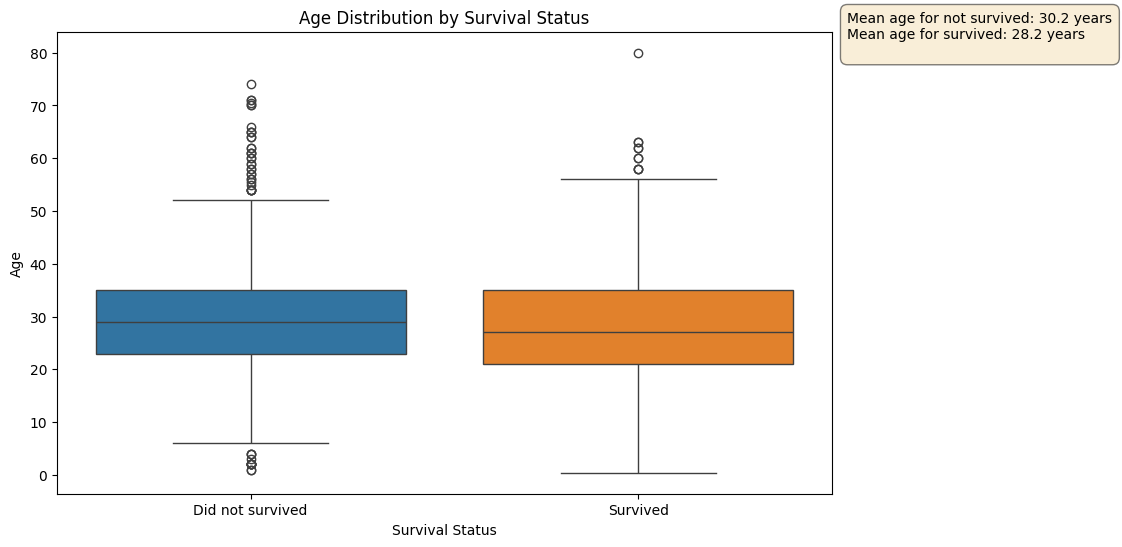

In [27]:
mean_not_survived = data[data['Survived'] == 0]['Age'].mean()
mean_survived = data[data['Survived'] == 1]['Age'].mean()

plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Survived', y='Age', hue='Survived', palette={0: '#1f77b4', 1: '#ff7f0e'}, legend =False)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survival Status')
plt.xticks([0,1], ['Did not survived', 'Survived'])

stats_legend = f"Mean age for not survived: {mean_not_survived:.1f} years\n" \
            f"Mean age for survived: {mean_survived:.1f} years\n"
plt.text(1.02, 0.95, stats_legend, transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.5", facecolor="wheat", alpha=0.5))

plt.show()

# Средний возраст выживших на 2 года года ниже, чем средний возраст погибших

In [28]:
# Проверим статистическую значимость
age_survived = data[data['Survived'] == 1]['Age'].dropna()
age_not_survived = data[data['Survived'] == 0]['Age'].dropna()
t_stat, p_value_age = ttest_ind(age_survived, age_not_survived)
print(f"T-test p-value for Age difference: {p_value_age:.4f}")

T-test p-value for Age difference: 0.0287


Получили результат p-value < 0.05. Значит, разница в возрасте между выжившими и погибшими статистически значима.

In [29]:
data['New_sex'] = np.where(data['Age'] < 18, 'child', data['Sex'])
data[data['Age']<20]

,Id,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,Family_size,Alone,New_sex
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S,Master,4,0,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,Mrs,1,0,child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.7000,S,Miss,2,0,child
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,7.8542,S,Miss,0,1,child
16,17,0,3,"Rice, Master. Eugene",male,2.0,29.1250,Q,Master,5,0,child
...,...,...,...,...,...,...,...,...,...,...,...,...
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,9.3500,S,Mrs,1,0,female
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,11.1333,S,Master,2,0,child
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,7.2250,C,Miss,0,1,child
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,7.8958,S,Mr,0,1,male


<Axes: >

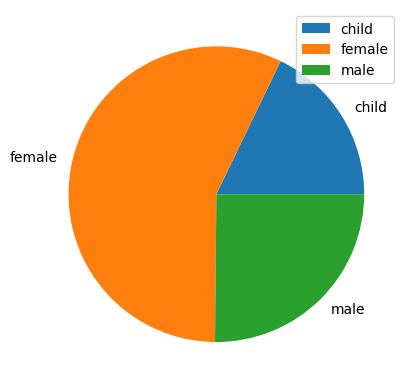

In [30]:
data[data['Survived']==1].groupby('New_sex').size().plot(kind='pie', legend ='True')

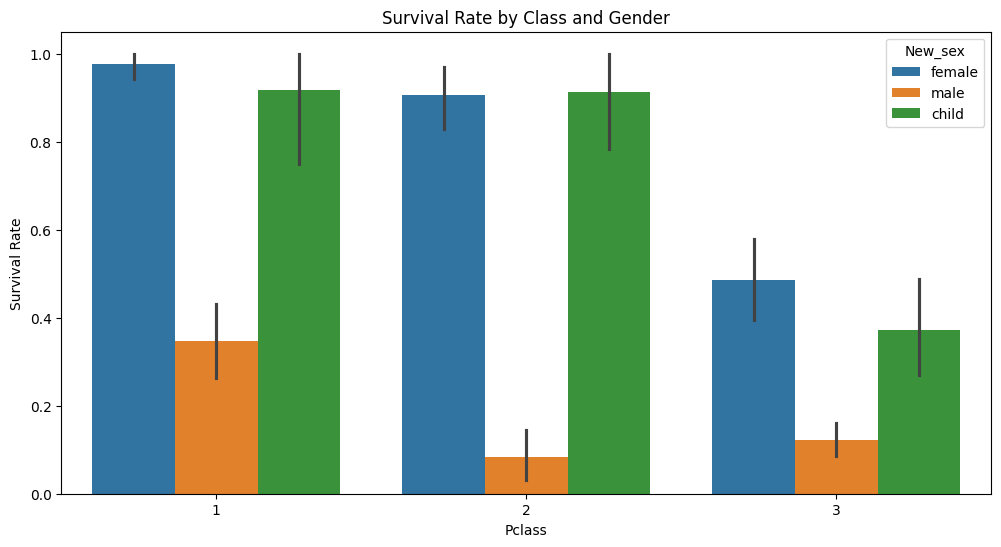

In [31]:
# Посмотрим также на выживаемость в зависимости от класса обслуживания (в первом классе путишествовали самые обеспеченные люди)
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Pclass', y='Survived', hue='New_sex')
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Rate')
plt.show()

In [32]:
# Рассчитываем проценты для легенды финального графика
survived_data = data[data['Survived'] == 1]
survived_counts = survived_data.groupby('New_sex').size()

total_female = len(data[data['New_sex'] == 'female'])
total_male = len(data[data['New_sex'] == 'male'])
total_child = len(data[data['New_sex'] == 'child'])
total_survived = len(data[data['Survived'] == 1])
total_passengers = len(data)

survived_female = len(data[(data['New_sex'] == 'female') & (data['Survived'] == 1)])
survived_male = len(data[(data['New_sex'] == 'male') & (data['Survived'] == 1)])
survived_child = len(data[(data['New_sex'] == 'child') & (data['Survived'] == 1)])

survival_rate = total_survived / total_passengers * 100
female_percent = round(survived_female / total_female * 100, 2)
male_percent = round(survived_male / total_male * 100, 2)
child_percent = round(survived_child / total_child * 100, 2)

print(female_percent, child_percent, male_percent)

75.29 53.98 16.57


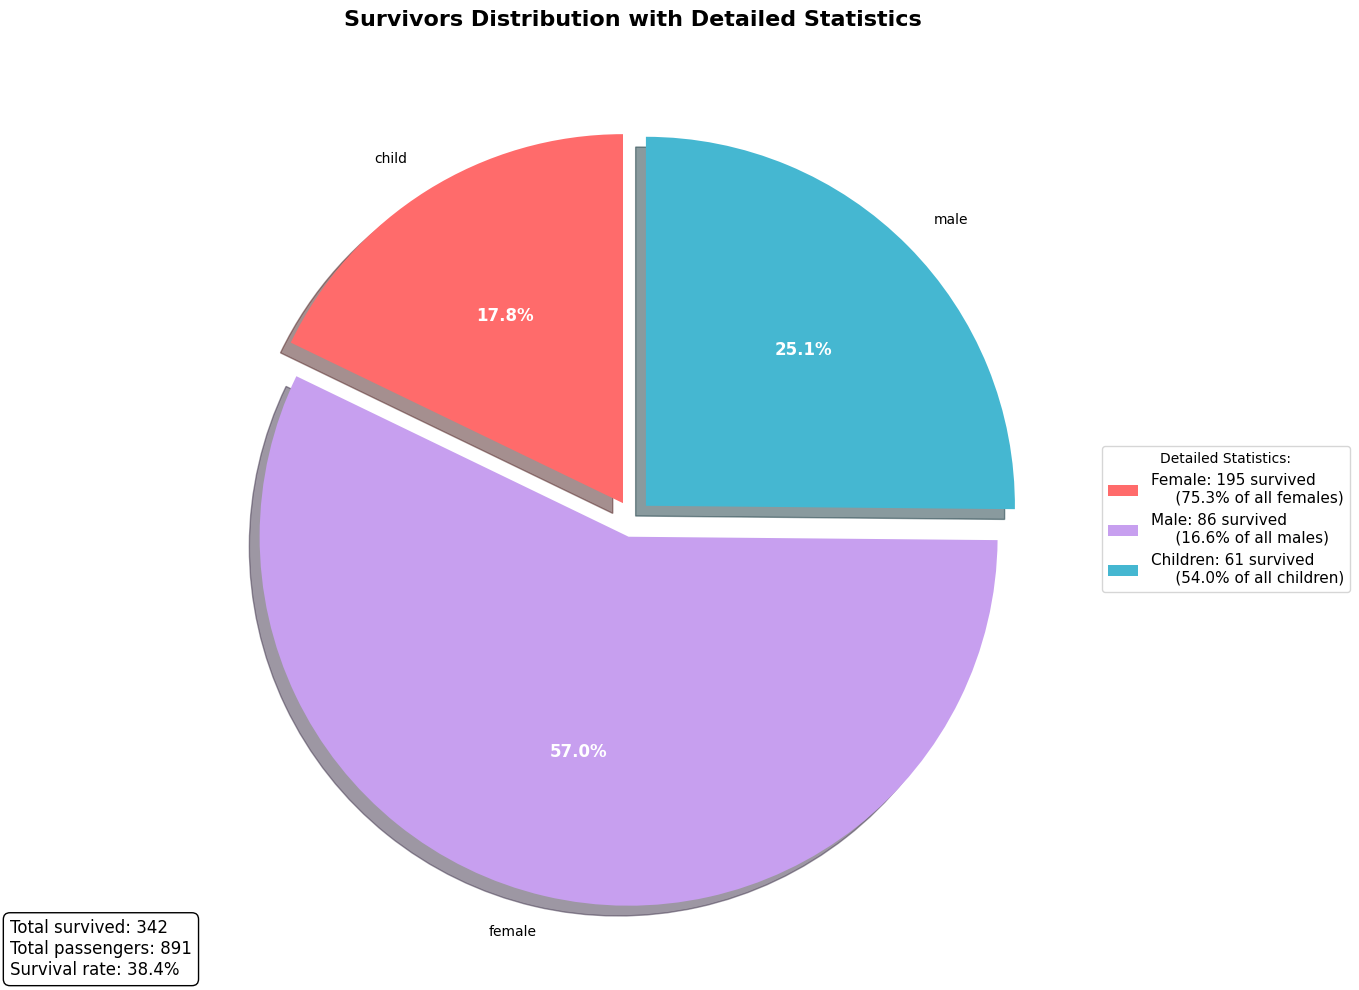

In [33]:
survived_legend = [
    f'Female: {survived_female} survived\n     ({female_percent:.1f}% of all females)',
    f'Male: {survived_male} survived\n     ({male_percent:.1f}% of all males)',
    f'Children: {survived_child} survived\n     ({child_percent:.1f}% of all children)']

plt.figure(figsize=(14, 10))
wedges, texts, autotexts = plt.pie(survived_counts.values,
                                  labels=survived_counts.index,
                                  colors=['#FF6B6B', '#C79FEF', '#45B7D1'],
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  shadow=True,
                                  explode=(0.05, 0.05, 0.05))

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.title('Survivors Distribution with Detailed Statistics\n',
          fontsize=16, fontweight='bold')

plt.legend(wedges, survived_legend,
          title="Detailed Statistics:",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=11)

total_text = f"Total survived: {total_survived}\n" \
            f"Total passengers: {total_passengers}\n" \
            f"Survival rate: {survival_rate:.1f}%"

plt.gcf().text(0.02, 0.02, total_text, fontsize=12,
              bbox=dict(boxstyle="round,pad=0.4", facecolor="white"))

plt.tight_layout()
plt.show()

Гипотеза №3 подтвердилась. Об этом свидетельствует процентное соотношение выживших к погибшим. Всего 16% мужчин от общего числа осталось в живых, в то время, как женщин и детей выжило 75% и 54% соответственно.


---



# Выводы и рекомендации

1. **Демографические факторы**: Пол и возраст - ключевые факторы выживаемости;
2. **Эффективность эвакуации**: Принцип "сначала женщины и дети" работал эффективно;
3. **Рекомендации**:
   - Усилить подготовку экипажа для работы с пассажирами, путешествующими в одиночку;
   - Разработать специальные протоколы для помощи мужчинам-пассажирам;
   - Учесть возрастные особенности при планировании эвакуации;

##Статистические выводы:
Наличие статистической значимости подтыверждает, что выявленные закономерности не случайны и могут использоваться для разработки протоколов систем безопасности.
1. Гипотеза №2: p-value < 0.001 → сильная статистическая значимость;
   - Связь между одиночным путешествием и выживаемостью подтверждена статистически;

2. Гипотеза №3: p-value = 0.029 → статистическая значимость на уровне 5%;
   - Разница в возрасте между группами выживших и погибших статистически значима;
   - Более молодые пассажиры имели значительно большие шансы на выживание;

Уровень значимости α = 0.05 принят как стандартный для социальных наук.


---


